In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk 





In [36]:
amazonstockdata = pd.read_csv ('AMZN.csv')
amazonstockdata.shape

(252, 7)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
n=200

In [38]:
X = amazonstockdata.iloc [:n,0].values
X1=X
#x1= amazonstockdata.iloc [:n,8].values
y = amazonstockdata.iloc [:n,4].values
col_names=['date']


X=X.reshape(-1, 1)
encoder.fit(X)
X=encoder.transform(X)
data= pd.DataFrame(data=X,columns=col_names)

data['high-low']=amazonstockdata.iloc [:n,2].values-amazonstockdata.iloc [:n,3].values
data['volume']=amazonstockdata.iloc [:n,6].values
#data['gender']=coviddata.iloc [:n,8].values
#data['contact_with_covid+']=coviddata.iloc [:n,9].values








data


,date,high-low,volume
0,0.0,79.300049,5486000
1,1.0,275.900146,7720400
2,2.0,177.379883,7231900
3,3.0,125.170166,5788900
4,4.0,113.770020,6394200
...,...,...,...
195,195.0,66.989990,2623000
196,196.0,59.050048,2211200
197,197.0,71.420166,2580600
198,198.0,66.500000,3192800


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data, y, test_size = 1/4, 
                                                     random_state = 0)



X_test.sort_values("date",axis=0,ascending=True,inplace=True)


X_train

<ipython-input-39-450bbf7302b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.sort_values("date",axis=0,ascending=True,inplace=True)


,date,high-low,volume
71,71.0,73.989990,4509700
124,124.0,66.350098,4394800
184,184.0,74.719971,3334900
97,97.0,57.739990,3790400
149,149.0,43.939941,2301400
...,...,...,...
67,67.0,124.879883,5812700
192,192.0,45.000000,3233600
117,117.0,33.000000,1451900
47,47.0,113.090088,4512200


In [40]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-4.96838256e-01 -2.32533744e-01  1.41733514e-01]
 [ 4.26458643e-01 -4.10734605e-01  6.57089052e-02]
 [ 1.47170041e+00 -2.15506901e-01 -6.35583373e-01]
 [-4.39001544e-02 -6.11565803e-01 -3.34197740e-01]
 [ 8.61976048e-01 -9.33452633e-01 -1.31940786e+00]
 [-1.31561098e+00 -5.00071365e-01 -7.58585764e-01]
 [-1.21108680e+00 -1.04844354e+00 -4.76123576e-01]
 [ 1.05360371e+00 -7.55479517e-01 -1.03641634e+00]
 [-1.03687984e+00  4.34804249e+00  2.96840654e+00]
 [-7.58148699e-01 -6.58682847e-01 -5.29122454e-01]
 [ 5.48403516e-01 -8.53210123e-01 -3.40692583e-02]
 [-6.13208506e-02 -8.38985038e-01 -4.58788112e-01]
 [ 1.41943833e+00 -1.04867700e+00 -1.29545580e+00]
 [-1.40271446e+00 -4.47659504e-02 -2.34816571e-01]
 [ 9.31658833e-01 -4.64149879e-01 -8.39043487e-01]
 [-1.31003635e-01 -1.14431199e+00 -9.12222963e-01]
 [-7.92990091e-01  4.33397570e-01  2.11538529e-01]
 [ 1.10586579e+00  6.70378023e-01  7.84799808e-01]
 [-8.45252180e-01  1.16230538e+00  1.75558576e+00]
 [-2.35527813e-01  2.46330228e-

In [74]:
from sklearn.neural_network import MLPRegressor
#from sklearn.datasets import make_regression


regr = MLPRegressor(random_state=1, max_iter=2000,activation='identity',hidden_layer_sizes=(500,800,900,700,900,900,500,400),batch_size=100).fit(X_train, y_train)

#regr.predict(X_test[:2])

regr.score(X_test, y_test)

-0.1248604744705255

In [75]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


prediction = regr.predict(X_test)

p=rmse(prediction,y_test)

print(p)

125.21267923323637


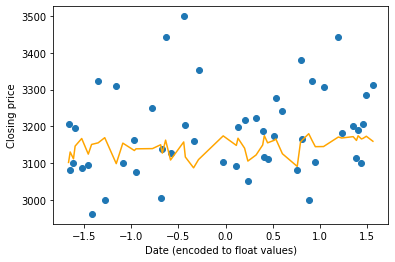

In [76]:


X_plot = X_test[:,0]
y_plot= prediction
plt.plot(X_plot,y_plot,color='orange')
plt.scatter(X_plot,y_test)

plt.xlabel("Date (encoded to float values)")
plt.ylabel("Closing price")
plt.show()

In [77]:
f= np.array(['2021-07-21'])
f=f.reshape(-1, 1)
encoder.fit(f)

f = encoder.transform(f)

data1= pd.DataFrame(data=f,columns=col_names)


data1['high-low']=73.989990
data1['volume']=4509700

data1=sc.transform(data1)

regr.predict(data1)

array([3135.36273076])